In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt

In [8]:
def load_and_normalize_dataset():
    DataSet = load_digits()
    DataFrame = pd.DataFrame(DataSet.data, columns= DataSet.feature_names)
    DataFrame['Target'] = DataSet.target

    normalizer = StandardScaler()
    normalized_Input_Fields = normalizer.fit_transform (DataFrame.iloc[:,: len(DataSet.feature_names)])

    return normalized_Input_Fields, DataFrame['Target'].values


def Split_into_K_Folds(K, X,Y):

    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    X = X[indices]
    Y = Y[indices]

    size_of_folds = [len(X)//K for i in range(K)]

    for i in range(len(X)%K ):
        size_of_folds[i] += 1 
    
    S_index = 0
    E_index = 0

    Folds = []

    for i in range (K):
        S_index =  E_index
        E_index = S_index + size_of_folds[i]
        Folds.append((X[S_index:E_index],Y[S_index:E_index]))
    
    return Folds

def K_Fold_Validation (K,X,Y):

    Folds = Split_into_K_Folds(K,X,Y)
    accuracy = []

    for i in range (K):
        test_x = Folds[i][0]
        test_y = Folds[i][1]

        
        train_x = np.vstack ([Folds[j][0] for j in range(K) if j!=i]) # vstack will combine all folds X vertically
        train_y = np.hstack ([Folds[j][1] for j in range(K) if j!=i]) # vstack will combine all folds Y horizontal

        model = LogisticRegression(max_iter=200)
        model.fit(train_x, train_y)

        predict_y = model.predict(test_x)
        accur = accuracy_score(test_y, predict_y)
        accuracy.append(accur)

        print (f'Accuracy: {accur:.4f}')

        if i == K-1:
            joblib.dump(model, 'guess_digit_model.pkl')
    print (f'Mean Accuracy: {np.mean(accuracy):0.4f}')

def predict_digit (X):
    model = joblib.load('guess_digit_model.pkl')
    Y = model.predict (X)
    return Y

Accuracy: 0.9833
Accuracy: 0.9694
Accuracy: 0.9749
Accuracy: 0.9749
Accuracy: 0.9526
Mean Accuracy: 0.9711

<----------(Result)--------->
Picture 1 is of digit 7.
Picture 2 is of digit 2.
Picture 3 is of digit 2.
Picture 4 is of digit 4.
Picture 5 is of digit 9.


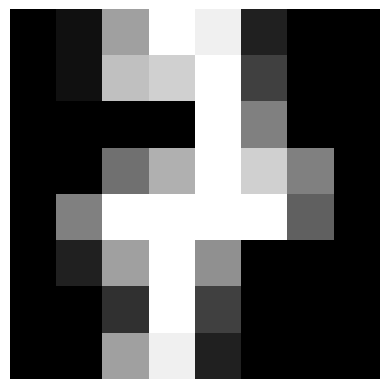

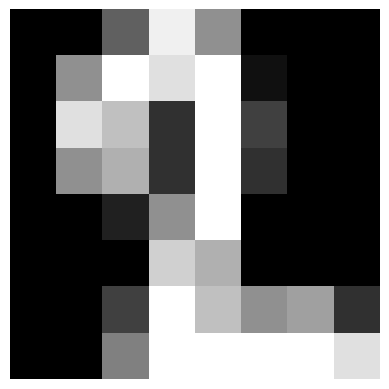

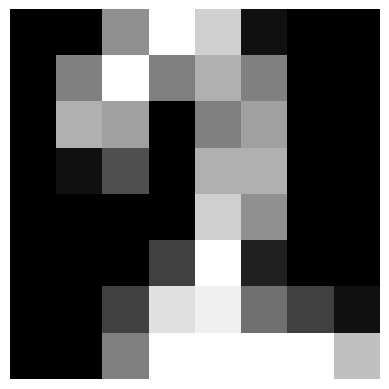

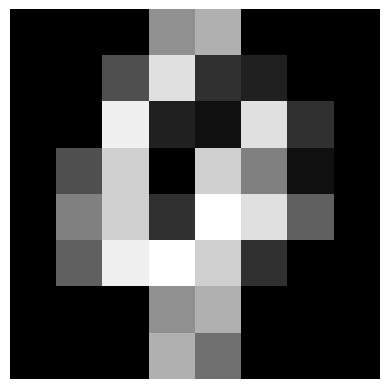

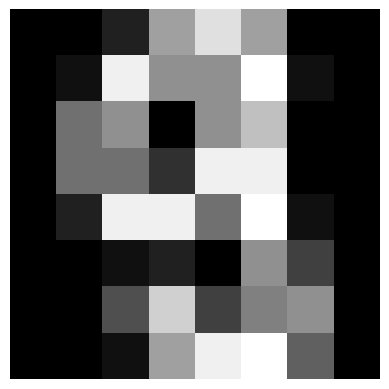

In [18]:
X,Y = load_and_normalize_dataset()
K_Fold_Validation (5, X,Y)

random_indices =[ np.random.randint(len(X)) for i in range (5)]
sample_of_5_pictures = X[random_indices]
result = predict_digit(sample_of_5_pictures)
print ()
print ('<----------(Result)--------->')

dataSet = load_digits()

for i,res in enumerate(result):
    image = dataSet.images[random_indices[i]]
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    print (f'Picture {i+1} is of digit {res}.')
    

